# Data Preparation:
Use the same preprocessed dataset from Part 1.

In [1]:
import pandas as pd

df = pd.read_csv('preprocessed.csv')
print(df.head(2))

   Target  Genetic Markers  Autoantibodies  Family History  \
0       0                0               0               0   
1       1                0               0               0   

   Environmental Factors  Insulin Levels  Age  BMI  Physical Activity  \
0                      0              40   44   38                  3   
1                      0              13    1   17                  3   

   Dietary Habits  ...  Genetic Testing  Neurological Assessments  \
0               0  ...                0                     100.0   
1               0  ...                1                       0.0   

   Liver Function Tests  Digestive Enzyme Levels  Birth Weight  \
0                     0                       56     37.645882   
1                     0                       28     12.704235   

   Early Onset Symptoms  Glucose Present  Ketones Present  Normal  \
0                     0              0.0              1.0     0.0   
1                     1              1.0        

In [2]:
print(df.shape)

(69478, 37)


In [3]:
print(df.columns)
print(df.index)

Index(['Target', 'Genetic Markers', 'Autoantibodies', 'Family History',
       'Environmental Factors', 'Insulin Levels', 'Age', 'BMI',
       'Physical Activity', 'Dietary Habits', 'Blood Pressure',
       'Cholesterol Levels', 'Waist Circumference', 'Blood Glucose Levels',
       'Ethnicity', 'Socioeconomic Factors', 'Smoking Status',
       'Alcohol Consumption', 'Glucose Tolerance Test', 'History of PCOS',
       'Previous Gestational Diabetes', 'Pregnancy History',
       'Weight Gain During Pregnancy', 'Pancreatic Health',
       'Pulmonary Function', 'Cystic Fibrosis Diagnosis',
       'Steroid Use History', 'Genetic Testing', 'Neurological Assessments',
       'Liver Function Tests', 'Digestive Enzyme Levels', 'Birth Weight',
       'Early Onset Symptoms', 'Glucose Present', 'Ketones Present', 'Normal',
       'Protein Present'],
      dtype='object')
RangeIndex(start=0, stop=69478, step=1)


I'll use only the features that the forward feature selection choose, that were able to train a random forest model with 90% training accuracy.

which are: ['Age','Blood Glucose Levels','BMI','Weight Gain During Pregnancy',
                 'Insulin Levels','Waist Circumference','Digestive Enzyme Levels',
                 'Cholesterol Levels','Blood Pressure', 'Pancreatic Health','Pulmonary Function',
                 'Birth Weight','Steroid Use History']

In [4]:
from sklearn.model_selection import train_test_split

best_features = ['Age','Blood Glucose Levels','BMI','Weight Gain During Pregnancy',
                 'Insulin Levels','Waist Circumference','Digestive Enzyme Levels',
                 'Cholesterol Levels','Blood Pressure', 'Pancreatic Health','Pulmonary Function',
                 'Birth Weight','Steroid Use History']

X = df[best_features]
y = df['Target']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Target')
y = df['Target']
# Split the dataset into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest:

In [10]:
import time
from sklearn.ensemble import RandomForestClassifier
import tracemalloc

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=2,
                             criterion="entropy",
                             max_features="sqrt",
                             max_samples=0.8,
                             random_state=0)

# Measure training time
start_time = time.time()
# Start memory tracking
tracemalloc.start()

clf.fit(X_train, y_train)
training_time = time.time() - start_time
# Stop tracking and get memory stats
current, peak = tracemalloc.get_traced_memory()

# Measure prediction time
start_time = time.time()
y_pred = clf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

# Print results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 0.2660 seconds
Prediction Time: 0.0113 seconds
Training Accuracy: 0.9275
Testing Accuracy: 0.8297

Memory usage during training stage:
Current memory usage: 0.1310 MB
Peak memory usage: 8.3382 MB


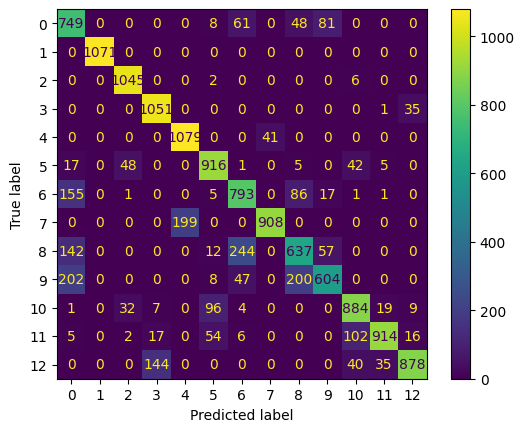

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8296632124352331
Precision: 0.8339373421091826
Recall: 0.8292925346998907
F1 Score: 0.826970491511428


## changing parameters:

what would happen if the estimators number was increased? would that increase the model accuracy?

In [11]:
import time
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=15,
                             criterion="entropy",
                             max_features="sqrt",
                             max_samples=0.8,
                             random_state=0)

# Measure training time
start_time = time.time()
# Start memory tracking
tracemalloc.start()

clf.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# Measure prediction time
start_time = time.time()
y_pred = clf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

# Print results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 1.6511 seconds
Prediction Time: 0.0427 seconds
Training Accuracy: 0.9944
Testing Accuracy: 0.8947

Memory usage during training stage:
Current memory usage: 0.4469 MB
Peak memory usage: 14.4677 MB


of course training more trees in the model took more time than training only 2.

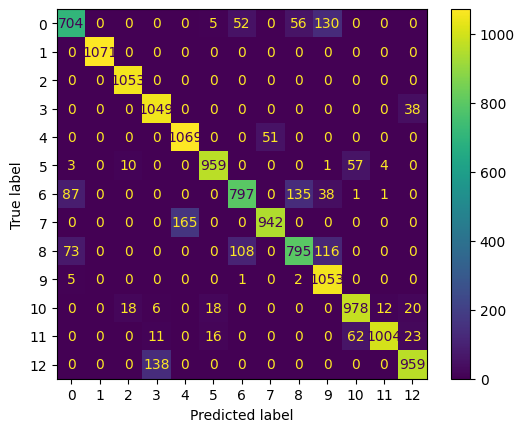

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8947179044329303
Precision: 0.8960245492691166
Recall: 0.8936846929492804
F1 Score: 0.8927279737494369


as seen by increasing the trees number from 2 to 15 the testing accuracy, precision, recall and F1 all increased.

In [27]:
import time
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=15,
                             criterion='gini',
                             max_features='sqrt',
                             max_samples=0.8,
                             random_state=0)

# Measure training time
start_time = time.time()
clf.fit(X_train, y_train)
training_time = time.time() - start_time

# Measure prediction time
start_time = time.time()
tracemalloc.start()

y_pred = clf.predict(X_test)
prediction_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()


# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

# Print results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 1.6683 seconds
Prediction Time: 0.0552 seconds
Training Accuracy: 0.9943
Testing Accuracy: 0.8939

Memory usage during training stage:
Current memory usage: 28.8783 MB
Peak memory usage: 60.2249 MB


In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8939263097294186
Precision: 0.8946991135999783
Recall: 0.8929804516419151
F1 Score: 0.8920293146866529


the training time for the 15 trees decreased a little because I used gini instead of entropy, which is known for being faster.

In [12]:
import time
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=15,
                             criterion='gini',
                             max_features=10,
                             max_samples=0.8,
                             random_state=0)

# Measure training time
start_time = time.time()
tracemalloc.start()

clf.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# Measure prediction time
start_time = time.time()
y_pred = clf.predict(X_test)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

# Print results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 3.8561 seconds
Prediction Time: 0.0396 seconds
Training Accuracy: 0.9932
Testing Accuracy: 0.8889

Memory usage during training stage:
Current memory usage: 0.4842 MB
Peak memory usage: 14.7679 MB


the training time increased because at each node more features are being considered for the splitting compared to last time.

the training accuracy increased, while the testing one decrased.

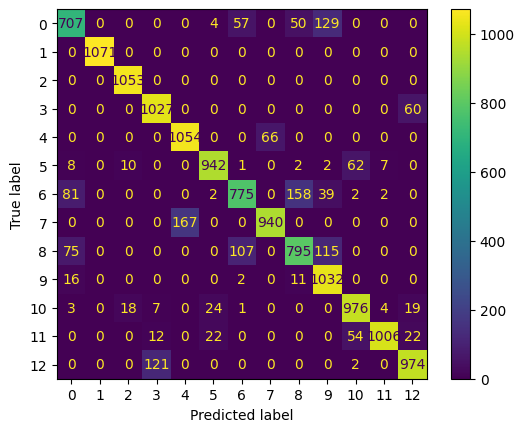

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8888888888888888
Precision: 0.8896573390504028
Recall: 0.887860525727269
F1 Score: 0.8870413266495157


changing the number of features to be considered for splitting at each node from square root of total features number to 10 features each time, decreased the testing metrics.

when each node consider almost all features available when splitting, the overall model have a higher chance of suffering from overfitting.

## changing preprocesses data:

what would happen if instead of only using the features selected by forward feature selection, I use all features available? would that lead to overfitting?

In [13]:
import time
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=2,
                             criterion='gini',
                             max_features='sqrt',
                             max_samples=0.8,
                             random_state=0)

# Measure training time
start_time = time.time()
tracemalloc.start()

clf.fit(X_train_all, y_train_all)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# Measure prediction time
start_time = time.time()
y_pred = clf.predict(X_test_all)
prediction_time = time.time() - start_time

# Calculate accuracy
train_accuracy = clf.score(X_train_all, y_train_all)
test_accuracy = clf.score(X_test_all, y_test_all)

# Print results
print(f"Training Time: {training_time:.4f} seconds")
print(f"Prediction Time: {prediction_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 0.2574 seconds
Prediction Time: 0.0133 seconds
Training Accuracy: 0.8965
Testing Accuracy: 0.7572

Memory usage during training stage:
Current memory usage: 0.4988 MB
Peak memory usage: 23.4074 MB


training accuracy did indead increase, on the other hand the testing accuracy decreased.

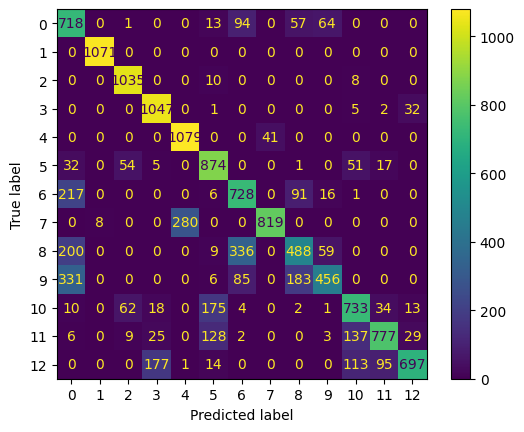

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test_all)
cm = confusion_matrix(y_test_all, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test_all, y_pred)
precision = precision_score(y_test_all, y_pred, average='macro')
recall = recall_score(y_test_all, y_pred, average='macro')
f1 = f1_score(y_test_all, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7571963154864709
Precision: 0.7704228596082289
Recall: 0.7573282331794685
F1 Score: 0.7516356874256632


indeed, testing metrics decreased a lot. this is a semptom of overfitting. the high dimentionality of the data lead the model to suffer from overfitting.

# SVM model:

In [14]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
clf = svm.SVC(kernel="linear", C=10, random_state=42)

import time
start_time = time.time()
tracemalloc.start()

clf.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 68.2861 seconds
Training Accuracy: 0.7673
Testing Accuracy: 0.7586

Memory usage during training stage:
Current memory usage: 12.6188 MB
Peak memory usage: 23.5123 MB


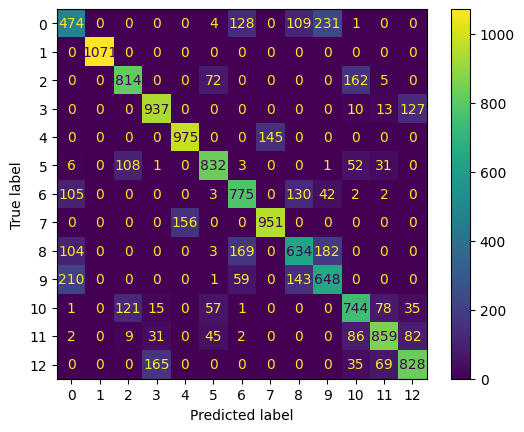

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7586355785837651
Precision: 0.7555070537990212
Recall: 0.7557458403727829
F1 Score: 0.7553276812457526


## changing some parameters:

In [15]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
clf = svm.SVC(kernel="linear", C=50, random_state=42)

import time
start_time = time.time()
tracemalloc.start()

clf.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 201.0589 seconds
Training Accuracy: 0.7677
Testing Accuracy: 0.7594

Memory usage during training stage:
Current memory usage: 12.6478 MB
Peak memory usage: 31.0460 MB


increasing the C parameter put more limitations on the model while training, it forces the model to be less tolerant with data points being inside the margin, or on the wrong side of the margin.

this increased the training time a lot, but in the same time didn't increase the model accuracy by much.

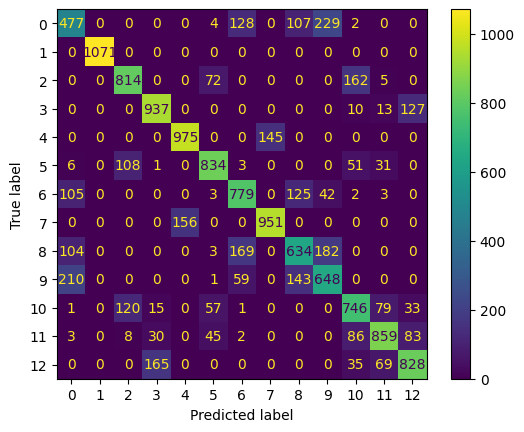

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7594271732872769
Precision: 0.7563029012480279
Recall: 0.75657510372213
F1 Score: 0.7561299736577329


the increased training time with bigger C parameter, didn't produce higher testing metrics.

In [16]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
clf = svm.SVC(kernel="rbf", C=10, random_state=42)

import time
start_time = time.time()
tracemalloc.start()

clf.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# Calculate accuracy
train_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)

print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 28.9298 seconds
Training Accuracy: 0.8721
Testing Accuracy: 0.8377

Memory usage during training stage:
Current memory usage: 11.7717 MB
Peak memory usage: 31.1032 MB


changing the kernel from linear to rbf, allowed the model to deal better with the nonlinearity of the data. the training time decreased, and the training and test accuracy increased.

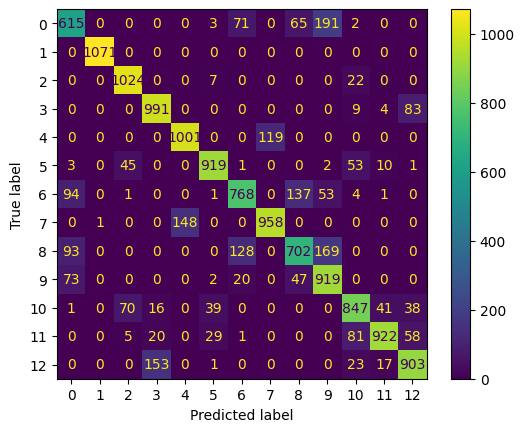

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [8]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8376511226252159
Precision: 0.8376421874558008
Recall: 0.8361678018193724
F1 Score: 0.8352283150823211


the overall performance of the model improved after switching its kernel from linear to rbf (Gaussian kernel)

## changing preprocesses data:

SVM is knowen to be sensetive to the training data, how would increasing the features number affect the model?

In [18]:
from sklearn.model_selection import train_test_split

best_features = ['Age','Blood Glucose Levels','BMI','Weight Gain During Pregnancy',
                 'Insulin Levels','Waist Circumference','Digestive Enzyme Levels',
                 'Cholesterol Levels','Blood Pressure', 'Pancreatic Health','Pulmonary Function',
                 'Birth Weight','Steroid Use History','Ketones Present']

X = df[best_features]
y = df['Target']
# Split the dataset into training and testing sets
X_train_one, X_test_one, y_train_one, y_test_one = train_test_split(X, y, test_size=0.2, random_state=42)

one feature was added to the training and testing data sets.

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_one)
X_test = scaler.transform(X_test_one)

# Train the SVM model
clf = svm.SVC(kernel="linear", C=10, random_state=42)

import time
start_time = time.time()
clf.fit(X_train_one, y_train_one)
training_time = time.time() - start_time

# Calculate accuracy
train_accuracy = clf.score(X_train_one, y_train_one)
test_accuracy = clf.score(X_test_one, y_test_one)

print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Time: 3282.0241 seconds
Training Accuracy: 0.7679
Testing Accuracy: 0.7592


incresing the number of features by only one, increased the training time a large amount, whilw the accuracy didn't change at all.

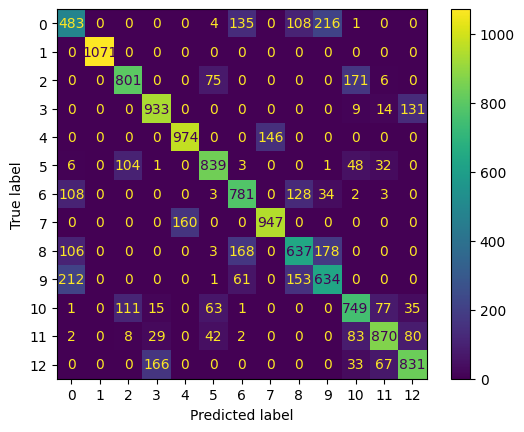

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test_one)
cm = confusion_matrix(y_test_one, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test_one, y_pred)
precision = precision_score(y_test_one, y_pred, average='macro')
recall = recall_score(y_test_one, y_pred, average='macro')
f1 = f1_score(y_test_one, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7592112838226828
Precision: 0.7560363112498988
Recall: 0.7563845983078725
F1 Score: 0.7559464944140447


all this added training time wasn't worth it at all, as it didn't improve the test metrics.

In [19]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_one)
X_test = scaler.transform(X_test_one)

# Train the SVM model
clf = svm.SVC(kernel="rbf", C=10, random_state=42)

import time
start_time = time.time()
tracemalloc.start()

clf.fit(X_train_one, y_train_one)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()


# Calculate accuracy
train_accuracy = clf.score(X_train_one, y_train_one)
test_accuracy = clf.score(X_test_one, y_test_one)

print(f"Training Time: {training_time:.4f} seconds")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

Training Time: 30.8022 seconds
Training Accuracy: 0.7940
Testing Accuracy: 0.7848

Memory usage during training stage:
Current memory usage: 30.0846 MB
Peak memory usage: 48.0381 MB


using a non linear kernel improved the training time by a generous amount.

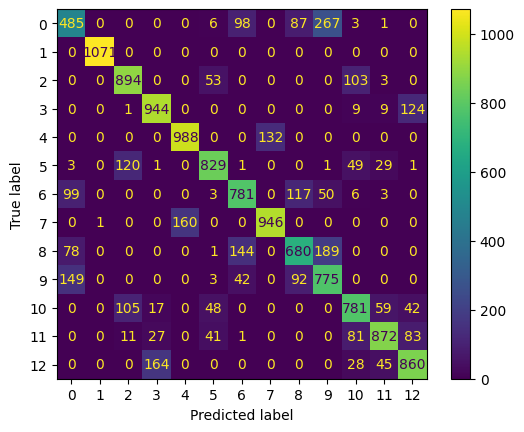

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = clf.predict(X_test_one)
cm = confusion_matrix(y_test_one, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=clf.classes_)

disp.plot()

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test_one, y_pred)
precision = precision_score(y_test_one, y_pred, average='macro')
recall = recall_score(y_test_one, y_pred, average='macro')
f1 = f1_score(y_test_one, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7848301669545192
Precision: 0.7833514557542743
Recall: 0.7820302120960783
F1 Score: 0.7815057182443031


but still that one added feature into the training data decreased the test metrics a lot, aas only this one feature affected the SVM model, and lead to it runing into overfitting.

this experiment shows that the SVM model is very sensitive to the data dimentionality.

# Multilayer Perceptron (MLP):

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 27.9520 seconds
Test Accuracy: 0.7840

Memory usage during training stage:
Current memory usage: 32.3305 MB
Peak memory usage: 48.0381 MB


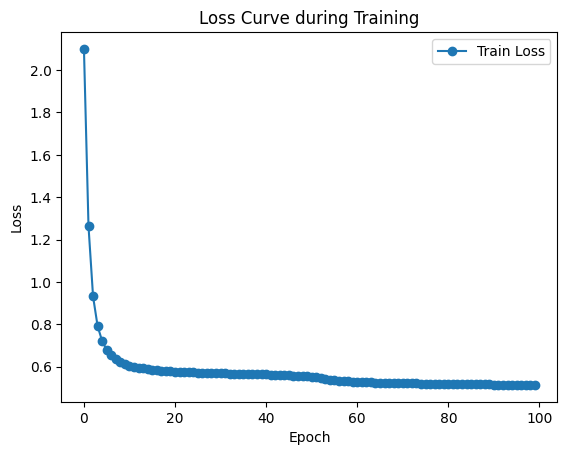

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100)

# Train the MLPClassifier
start_time = time.time()
# Start memory tracking
tracemalloc.start()

mlp.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

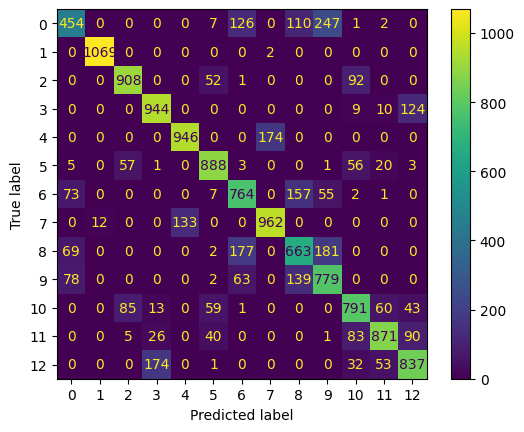

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mlp.classes_)

disp.plot()

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.782671272308578
Precision: 0.781990715442229
Recall: 0.779914764154137
F1 Score: 0.7790387252161045


## changing some parameters:

the default parameters used in the previous model are suitable for simple linear data. what would hapen if parameters suitable for nonlinear data were used? would the test metrics improve?

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 29.7002 seconds
Test Accuracy: 0.7645

Memory usage during training stage:
Current memory usage: 33.9082 MB
Peak memory usage: 48.0381 MB


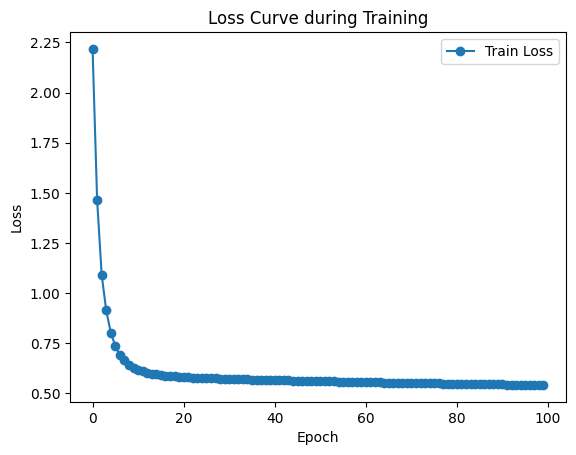

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=100, activation='relu')

# Train the MLPClassifier
start_time = time.time()
tracemalloc.start()

mlp.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()


# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

the training time didn't change much.

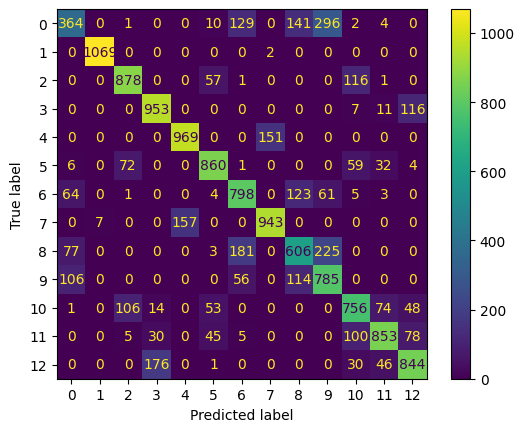

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mlp.classes_)

disp.plot()

In [17]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7684225676453655
Precision: 0.7658882190016498
Recall: 0.7648063512677405
F1 Score: 0.7624102948299463


the test metrics decreased a little, did the model run into an overfitting problem? or does it need more than one hidden layer to learn the relationships between the data better? or would increasing the number of neurons in each hidden layer help?

maybe the learning rate is the parameter that need to be changed?

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 44.8687 seconds
Test Accuracy: 0.7851

Memory usage during training stage:
Current memory usage: 34.7742 MB
Peak memory usage: 48.0381 MB


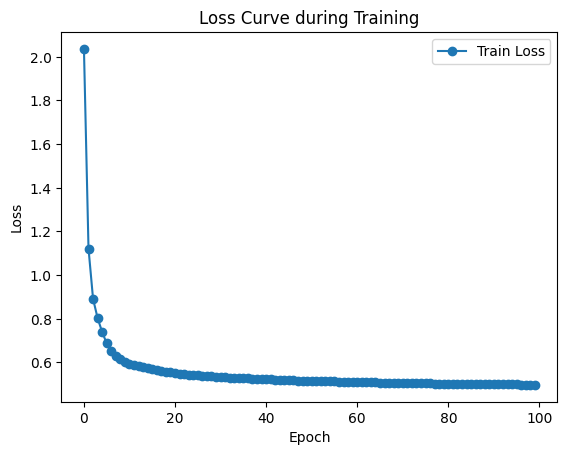

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=100, activation='relu')

# Train the MLPClassifier
start_time = time.time()
tracemalloc.start()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()


# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

increasing the number of hidden layers of caurse increased the training time.

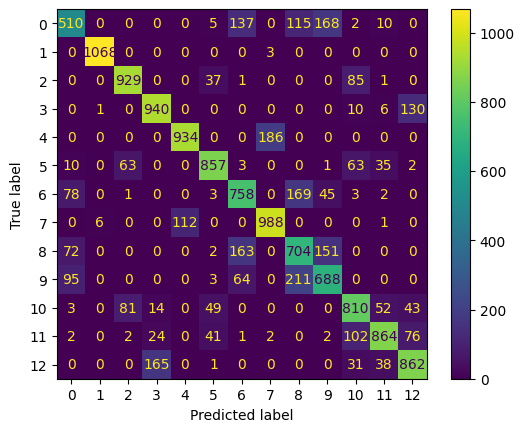

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mlp.classes_)

disp.plot()

In [20]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7852619458837076
Precision: 0.7850972060857244
Recall: 0.7828336340687969
F1 Score: 0.7829079001124213


the test metrics did improve by a little, but can we improve them more?

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Training Time: 45.4991 seconds
Test Accuracy: 0.7963

Memory usage during training stage:
Current memory usage: 35.6320 MB
Peak memory usage: 48.0381 MB


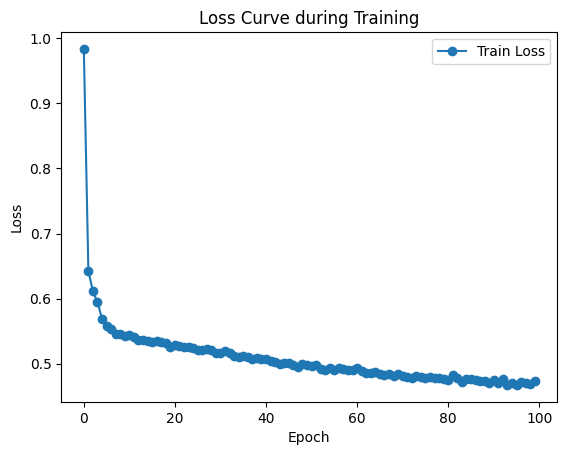

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=100, activation='relu',learning_rate_init=0.01)

# Train the MLPClassifier
start_time = time.time()
tracemalloc.start()
mlp.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

the training time didn't change much, but the loss Curve did change, we see now that the loss took longer to reach a minimum value, taking smaller steps each time.

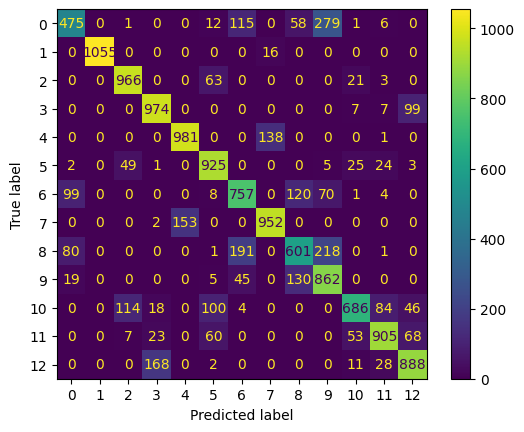

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mlp.classes_)

disp.plot()

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7935377086931491
Precision: 0.7952217213478
Recall: 0.7908202231912219
F1 Score: 0.7885193272278225


the test metrics did indeed improve some more, maybe the previous models had a too big learning rate, that they suffered from overshooting? while this one with a smaller learning step could reach a minimum loss value.


last thing I want to try is to increase the number of neurons in each layer, and the max iterations number, as a last try to improve the test metrics some more.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:697: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Training Time: 50.6533 seconds
Test Accuracy: 0.8559

Memory usage during training stage:
Current memory usage: 36.5529 MB
Peak memory usage: 58.5887 MB


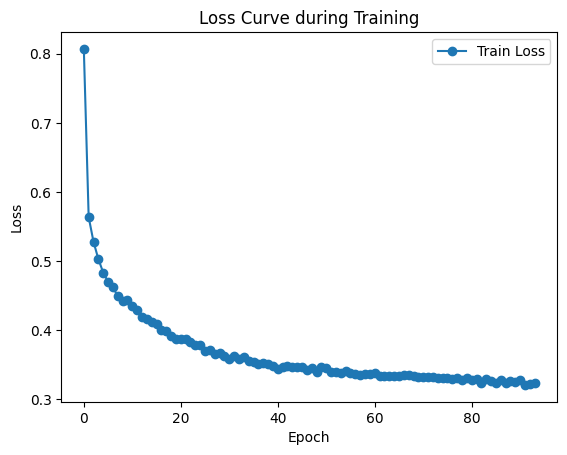

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(30,20,15), max_iter=1000, activation='relu',learning_rate_init=0.01)

# Train the MLPClassifier
start_time = time.time()
tracemalloc.start()

mlp.fit(X_train, y_train)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()

# make prediction on the testing part
y_pred = mlp.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

of course the increased max iterations and neurons increased the training time.

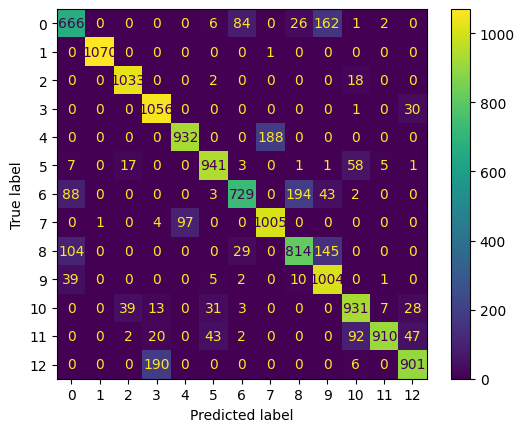

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mlp.classes_)

disp.plot()

In [27]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8629821531375935
Precision: 0.8661080977367981
Recall: 0.8620534791329502
F1 Score: 0.8608803132223888


finaly the model test accuracy and precision reached more than 80%, meaning that the new parameters helped the model train better on the data, and tune the learning parameters to predect test data better.

# changing preprocesses data:

would training the model on all the feature improve it more? or would it lead the model into overfitting?

Training Time: 95.9298 seconds
Test Accuracy: 0.7826

Memory usage during training stage:
Current memory usage: 37.2966 MB
Peak memory usage: 60.2249 MB


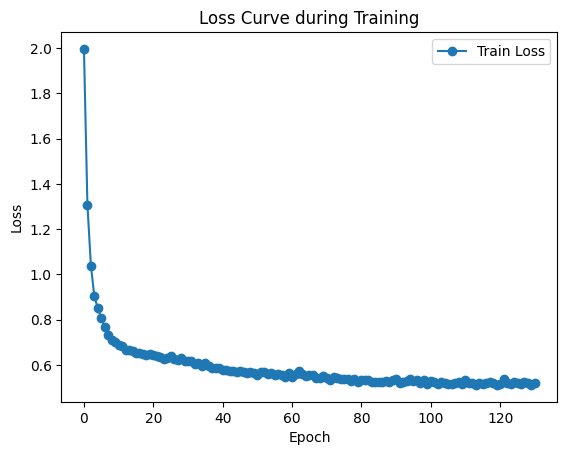

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time


# Create an MLPClassifier with one hidden layer of 10 neurons
mlp = MLPClassifier(hidden_layer_sizes=(30,20,15), max_iter=1000, activation='relu',learning_rate_init=0.01)

# Train the MLPClassifier
start_time = time.time()
tracemalloc.start()

mlp.fit(X_train_all, y_train_all)
training_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()


# make prediction on the testing part
y_pred = mlp.predict(X_test_all)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test_all, y_pred)
print(f"Training Time: {training_time:.4f} seconds")
print(f"Test Accuracy: {accuracy:.4f}")
print()
print("Memory usage during training stage:")
print(f"Current memory usage: {current / 1024**2:.4f} MB")
print(f"Peak memory usage: {peak / 1024**2:.4f} MB")

# Plot the loss curve
plt.plot(mlp.loss_curve_, marker='o', label='Train Loss')
plt.title('Loss Curve during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

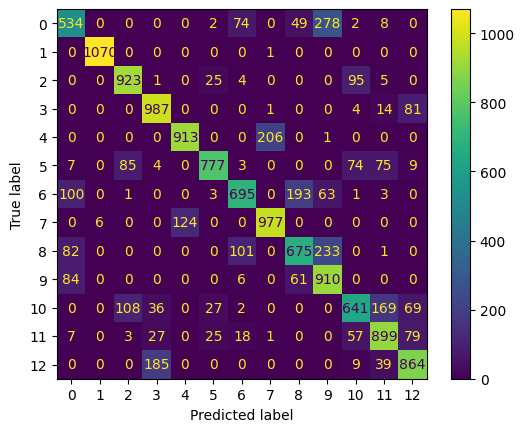

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# y_pred = mlp.predict(X_test)
cm = confusion_matrix(y_test_all, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=mlp.classes_)

disp.plot()

In [31]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test_all, y_pred)
precision = precision_score(y_test_all, y_pred, average='macro')
recall = recall_score(y_test_all, y_pred, average='macro')
f1 = f1_score(y_test_all, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7818796776050662
Precision: 0.7848458914934446
Recall: 0.7793277220256652
F1 Score: 0.7781913294803426


the test metrics decreased a lot, this intecate that the model with the added features suffered from overfitting.